In [1]:
import numpy as np
import scipy as sp
from scipy import linalg 
import time as time
import random_matrix as rm
import matplotlib.pyplot as plt ## doesn't exist in python2.7 ????????
import sys
import os as os


In [2]:
sys.path.append(os.path.join(".."))
import matrix_utils as mu


In [45]:
#matrix_sizes = [1,2,3,3]
matrix_sizes = range(1,6)
track_times=np.zeros([len(matrix_sizes), 4])

for i in range(0,len(matrix_sizes)):
    size=matrix_sizes[i]
    mat= rm.get_matrix(size)

    a = time.time()
    linalg.expm(mat)
    b = time.time()

    c=time.time()
    emat = mu.expm_special(mat)
    d=time.time()

    time_linalg = b-a
    time_expm = d-c

    track_times[i,0]= 2**matrix_sizes[i]
    track_times[i,1]= time_linalg
    track_times[i,2]= time_expm
    track_times[i,3]= time_linalg/time_expm

print('tracking:')
print(track_times) 


ok
ok
ok
ok
ok
ok
ok
ok
ok
tracking:
[[  2.00000000e+00   1.61600113e-03   1.47104263e-04   1.09854133e+01]
 [  4.00000000e+00   1.39403343e-03   1.99079514e-04   7.00239521e+00]
 [  8.00000000e+00   8.44001770e-04   2.02894211e-04   4.15981199e+00]
 [  1.60000000e+01   3.75008583e-03   5.19037247e-04   7.22508039e+00]
 [  3.20000000e+01   2.52101421e-02   2.16293335e-03   1.16555335e+01]
 [  6.40000000e+01   6.77769184e-02   1.55999660e-02   4.34468371e+00]
 [  1.28000000e+02   7.69338608e-02   1.31610870e-01   5.84555520e-01]
 [  2.56000000e+02   5.25429964e-01   7.20131159e-01   7.29630926e-01]
 [  5.12000000e+02   4.55694294e+00   1.74269700e+01   2.61487966e-01]]


In [53]:
plt.semilogx(basex=2)
plt.semilogy(track_times[:,0], track_times[:,1], label='LinAlg')
plt.semilogy(track_times[:,0], track_times[:,2], label='ExpmSpecial')
plt.legend()
plt.show()
#plt.savefig('times.png')

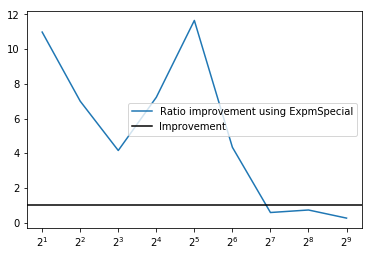

In [54]:
plt.clf()
plt.semilogx(basex=2)
plt.plot(track_times[:,0], track_times[:,3], label='Ratio improvement using ExpmSpecial')
plt.axhline(y=1, color='black', label='Improvement')
plt.legend()
plt.show()
#plt.savefig('improvement.png')